# A simple demonstration of supervised learning and unsupervised learning on the Autism dataset from UCI Machine Learning Repository

From: https://archive.ics.uci.edu/ml/datasets/Autism+Screening+Adult#

Date: 2018-07-28

Purpose: Playing around with autism dataset. Done in half a day.

# Extraction of data and cleaning

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = arff.loadarff('Autism-Adult-Data.arff')
df = pd.DataFrame(data[0])

def remove_b(x):
    if isinstance(x, (float)):
        return x
    else:
        return x.decode("utf-8") 
df = df.applymap(remove_b)
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6.0,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6.0,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,'18 and more',?,NO


In [2]:
# clean data - age and take out top 5 countries only to reduce dimensionality
df_clean = df.copy()

# clean out error and missing value
def clean_age(x):
    if x == 383:
        return 38 # probably 38
    else:
        return x
df_clean['age'].fillna(df_clean['age'].median(), inplace=True)
df_clean['age'] = df_clean['age'].apply(clean_age)

def return_top_5(ser):
    top5 = ser.value_counts().head(5)
    def remove_not_top_5(x, top5):
        if x not in top5:
            return 'Others'
        else:
            return x
    return ser.apply(remove_not_top_5, top5=top5)
df_clean['contry_of_res'] = return_top_5(df_clean['contry_of_res'])

# clean ASD target to 1 = Yes, 0 = No
df_clean['Class/ASD'] = df_clean['Class/ASD'].map({'YES':1, 'NO':0})

df_clean.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6.0,'18 and more',Self,0
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Others,no,5.0,'18 and more',Self,0
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Others,no,8.0,'18 and more',Parent,1
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6.0,'18 and more',Self,0
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Others,no,2.0,'18 and more',?,0


# Visualization: Correlation of Questions A1-A10
See the correlation of each individual question to the result and classification of ASD.

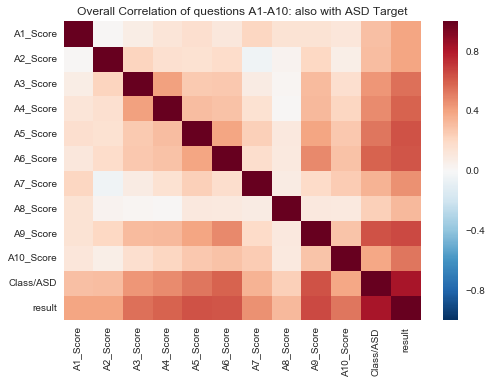

In [3]:
df_10q = df_clean[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 
                   'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 
                   'Class/ASD', 'result', 
                   ]]
df_10q = df_10q.astype(int)

sns.heatmap(df_10q.corr())
plt.title('Overall Correlation of questions A1-A10: also with ASD Target')
plt.show()

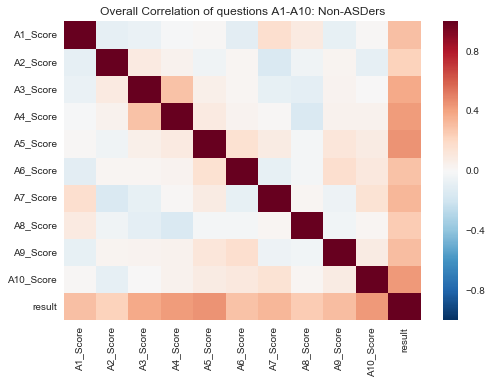

In [4]:
# plot by non-ASD and ASD
sns.heatmap(df_10q[df_10q['Class/ASD'] == 0].drop('Class/ASD', axis=1).corr())
plt.title('Overall Correlation of questions A1-A10: Non-ASDers')
plt.show()

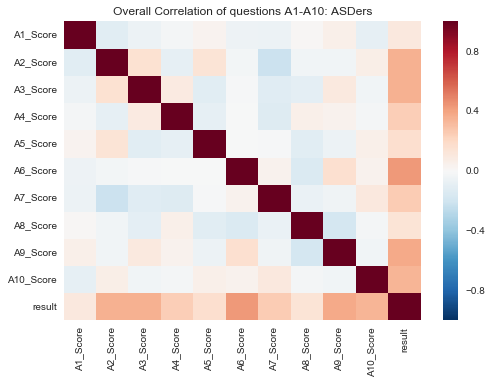

In [5]:
sns.heatmap(df_10q[df_10q['Class/ASD'] == 1].drop('Class/ASD', axis=1).corr())
plt.title('Overall Correlation of questions A1-A10: ASDers')
plt.show()

# Establish df_X and df_y for analysis further on

In [6]:
# create df_X
df_X = df_clean[['A1_Score','A2_Score', 'A3_Score','A4_Score', 'A5_Score',
                 'A6_Score', 'A7_Score','A8_Score', 'A9_Score', 'A10_Score',
                 #'gender', 'age', 'contry_of_res',
                 ]]

# decided to remove this features and simply do a 10Q analysis
#df_X = pd.get_dummies(df_X, columns=['gender', 'contry_of_res'], drop_first=True)

df_X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,1,1,1,1,0,0,1,1,0,0
1,1,1,0,1,0,0,0,1,0,1
2,1,1,0,1,1,0,1,1,1,1
3,1,1,0,1,0,0,1,1,0,1
4,1,0,0,0,0,0,0,1,0,0


In [7]:
# create df_y
df_y = df_clean['Class/ASD']
print('1 = ASD, 0 = No ASD')
df_y.value_counts()

1 = ASD, 0 = No ASD


0    515
1    189
Name: Class/ASD, dtype: int64

# Principal Component Analysis - A quick visualization

PCA to visualize the differences in features. Seeing the difference between 2D and 3D PCA

In [8]:
from sklearn.decomposition import PCA

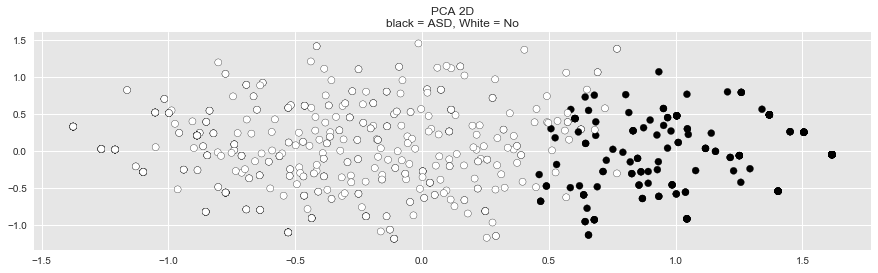

In [9]:
# 2D pca
def plot_2d(pca_X, c, title, cmap='binary'):
    fig = plt.figure(1, figsize=(15, 4))
    plt.clf()

    plt.scatter(pca_X[:, 0], pca_X[:, 1], c=c, cmap=plt.cm.binary, edgecolor='k')
    ax = plt.gca()
    ax.set_facecolor((0.9, 0.9, 0.9))
    plt.title(title)
    plt.show()
    
pca = PCA(n_components=2)
pca_X = pca.fit_transform(df_X)

plot_2d(pca_X, c=df_y, title='PCA 2D\nblack = ASD, White = No')

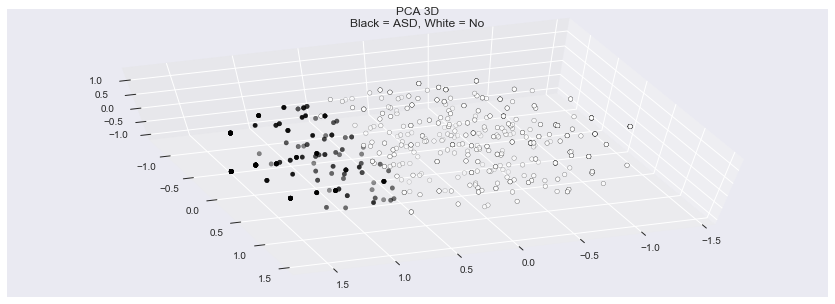

In [10]:
def plot_3d(pca_X, c, title, cmap='binary'):
    fig = plt.figure(1, figsize=(12, 4))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=65, azim=70)
    plt.cla()
    plt.title(title)
    ax.scatter(pca_X[:, 0], pca_X[:, 1], pca_X[:, 2], c=c, cmap=cmap, edgecolor='k')
    plt.show()

pca = PCA(n_components=3)
pca_X = pca.fit_transform(df_X)

plot_3d(pca_X, c=df_y, title='PCA 3D\nBlack = ASD, White = No')

# Supervised Classification - testing a few models

In [11]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split, KFold

from sklearn.metrics import confusion_matrix

In [12]:
# comparison of multiple models
list_of_models = [
    BernoulliNB(),
    KNeighborsClassifier(),
    ExtraTreesClassifier(n_estimators=200),
    LinearSVC(),

    RandomForestClassifier(n_estimators=5),
    RandomForestClassifier(n_estimators=50),
    RandomForestClassifier(n_estimators=500),
]

def score_and_confusion(model):
    print('Score of {}:\n{:.2f}\n'.format(str(model), model.score(X_test, y_test)))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, model.predict(X_test)),'\n')

X_train, X_test, y_train, y_test = train_test_split(pca_X, df_y)
for model in list_of_models:
    model.fit(X_train, y_train)
    score_and_confusion(model)

Score of BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True):
0.87

Confusion Matrix:
[[107  16]
 [  7  46]] 

Score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'):
1.00

Confusion Matrix:
[[123   0]
 [  0  53]] 

Score of ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False):
1.00

Confusion Matrix:
[[123   0]
 [  0  53]] 

Score of LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
  

In [13]:
# k-fold classification and model selection based purely on score

# k-folds
kf = KFold(n_splits=5)
print('Running KFold for 5 splits and choosing the median score...\n')

for model in list_of_models:
    
    list_score = []
    for train_index, test_index in kf.split(pca_X, df_y):
        X_train, X_test = pca_X[train_index], pca_X[test_index]
        y_train, y_test = df_y[train_index], df_y[test_index]

        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        list_score.append(score)
    
    print('Median Results for {}\n{:.2f}\n'.format(str(model), np.median(list_score)))    

Running KFold for 5 splits and choosing the median score...

Median Results for BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
0.84

Median Results for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
0.99

Median Results for ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
0.99

Median Results for LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
1.00

Median Resu

# Unsupervised Learning Section

In [14]:
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, SpectralClustering

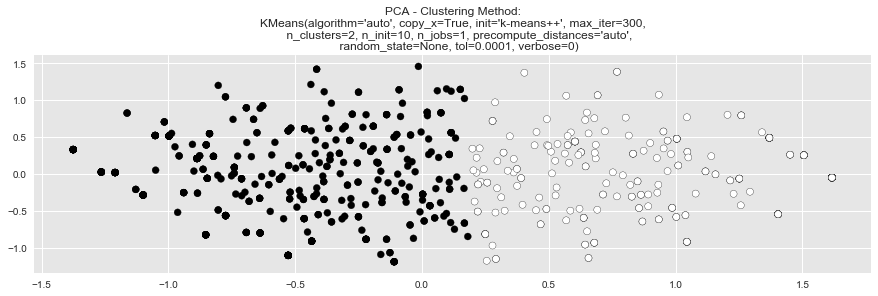

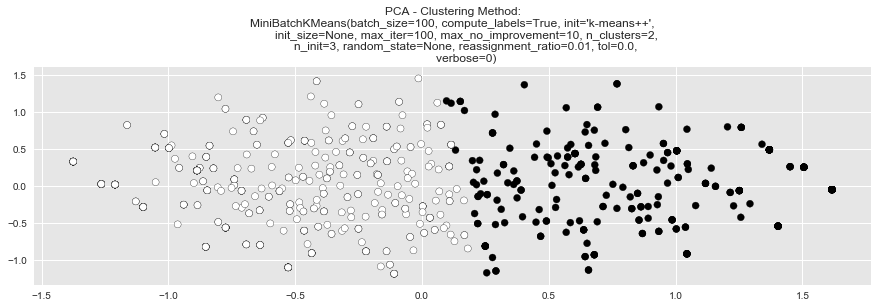

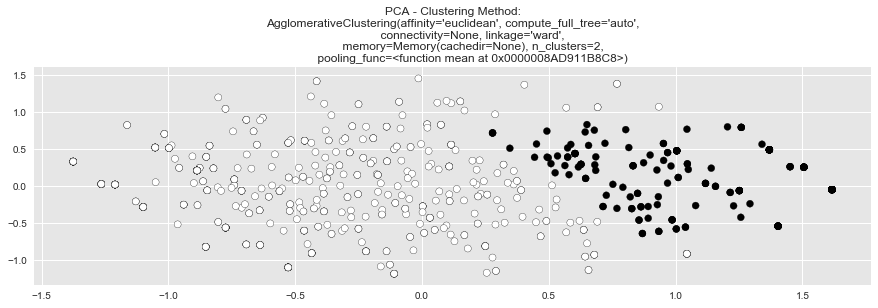

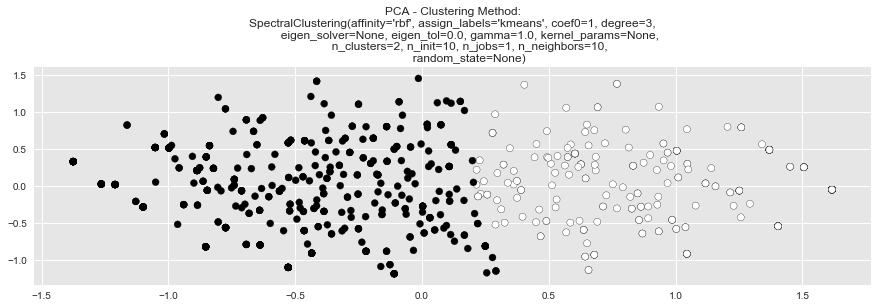

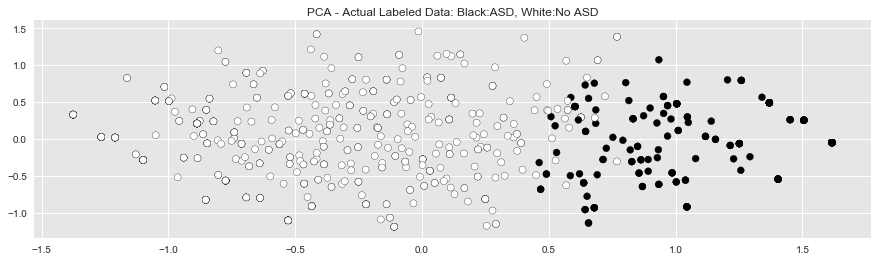

In [15]:
list_unsupervised_models = [
    KMeans(2),
    MiniBatchKMeans(2),
    AgglomerativeClustering(2),
    SpectralClustering(2),
]

pca = PCA(n_components=2)
pca_X = pca.fit_transform(df_X)

for model in list_unsupervised_models:
    model.fit(pca_X)
    y_cluster = model.labels_
    plot_2d(pca_X, c=y_cluster, title='PCA - Clustering Method:\n{}'.format(str(model)))

plot_2d(pca_X, c=df_y, title='PCA - Actual Labeled Data: Black:ASD, White:No ASD')

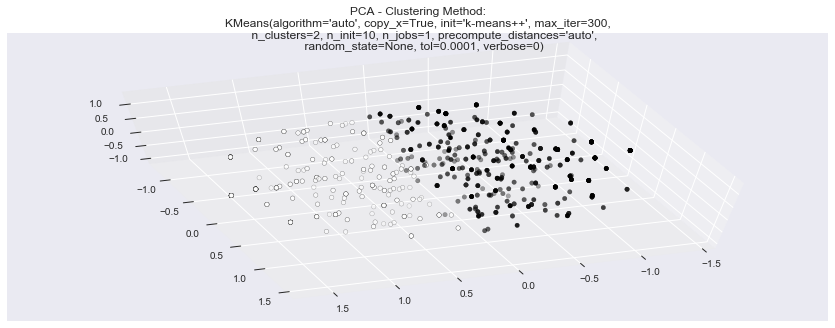

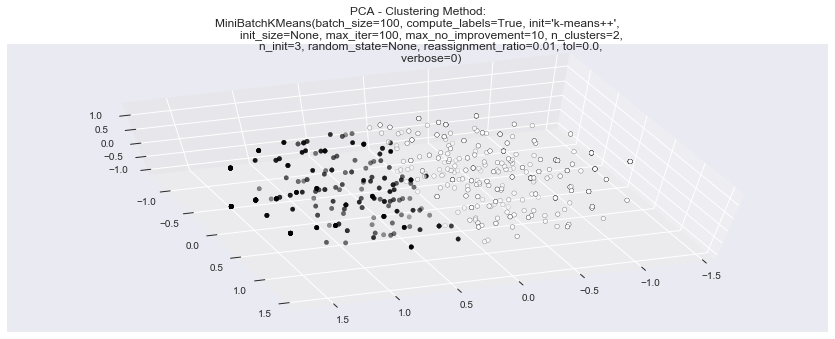

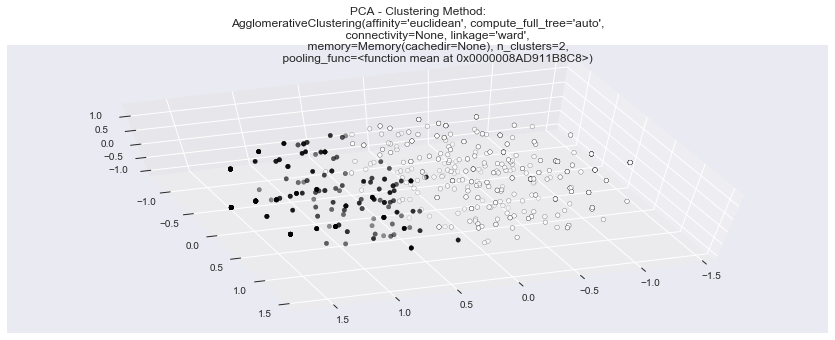

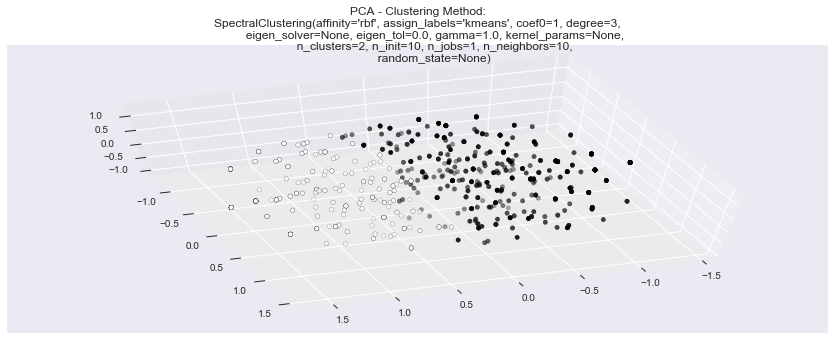

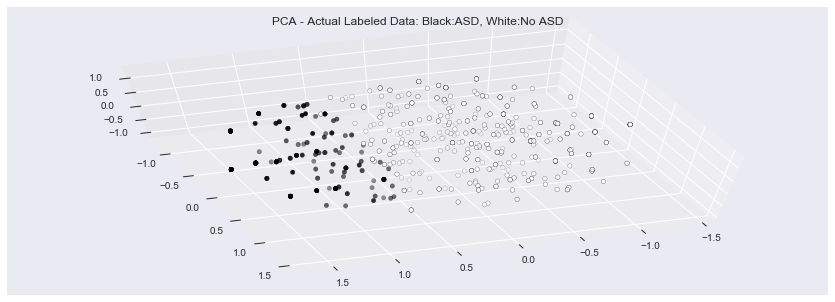

In [16]:
pca = PCA(n_components=3)
pca_X = pca.fit_transform(df_X)

for model in list_unsupervised_models:
    model.fit(pca_X)
    y_cluster = model.labels_
    plot_3d(pca_X, c=y_cluster, title='PCA - Clustering Method:\n{}'.format(str(model)))

plot_3d(pca_X, c=df_y, title='PCA - Actual Labeled Data: Black:ASD, White:No ASD')